## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Fri Sep 16 18:47:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/breakHis_project/train'
valid_path = '/content/drive/MyDrive/breakHis_project/val'


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/breakHis_project/train/*')

In [ ]:
folders

['/content/drive/MyDrive/breakHis_project/train/covid',
 '/content/drive/MyDrive/breakHis_project/train/normal',
 '/content/drive/MyDrive/breakHis_project/train/pneumonia']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
len(folders)

3

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/breakHis_project/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/breakHis_project/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2823 images belonging to 3 classes.
Found 807 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/breakHis_project/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 405 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
89/89 [==============================] - 56s 495ms/step - loss: 0.3875 - accuracy: 0.8569 - val_loss: 0.1378 - val_accuracy: 0.9616
Epoch 2/20
89/89 [==============================] - 43s 483ms/step - loss: 0.1961 - accuracy: 0.9352 - val_loss: 0.1366 - val_accuracy: 0.9529
Epoch 3/20
89/89 [==============================] - 42s 474ms/step - loss: 0.1820 - accuracy: 0.9366 - val_loss: 0.1115 - val_accuracy: 0.9653
Epoch 4/20
89/89 [==============================] - 43s 479ms/step - loss: 0.1588 - accuracy: 0.9511 - val_loss: 0.0980 - val_accuracy: 0.9678
Epoch 5/20
89/89 [==============================] - 43s 485ms/step - loss: 0.1592 - accuracy: 0.9405 - val_loss: 0.1625 - val_accuracy: 0.9442
Epoch 6/20
89/89 [==============================] - 43s 487ms/step - loss: 0.1356 - accuracy: 0.9532 - val_loss: 0.2264 - val_accuracy: 0.9244
Epoch 7/20
89/89 [==============================] - 54s 603ms/step - loss: 0.1298 - accuracy: 0.9561 - val_loss: 0.2471 - val_accuracy: 0.9145

In [ ]:
import matplotlib.pyplot as plt

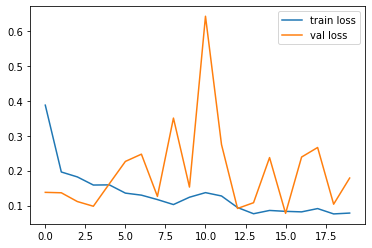

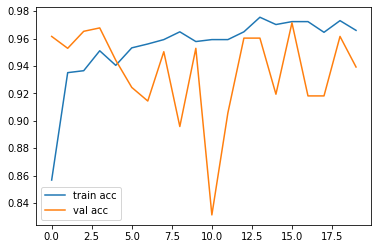

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# average training accuracy
np.mean(r.history['accuracy'])

0.954463341832161

In [ ]:
# val accuracy
model.evaluate(val_set)

26/26 [==============================] - 4s 158ms/step - loss: 0.1788 - accuracy: 0.9393


[0.17881956696510315, 0.9392812848091125]

In [ ]:
# test accuracy
model.evaluate(test_set)

13/13 [==============================] - 4s 338ms/step - loss: 0.2062 - accuracy: 0.9481


[0.20619991421699524, 0.9481481313705444]

In [ ]:
test_set.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
prob = model.predict(test_set)
predIdxs = np.argmax(prob, axis=1) 

print('\n')
print(classification_report(test_set.labels, predIdxs,target_names = ['COVID','Normal','Viral Pneumonia'], digits=5))



                 precision    recall  f1-score   support

          COVID    0.39850   0.39259   0.39552       135
         Normal    0.32237   0.36296   0.34146       135
Viral Pneumonia    0.37500   0.33333   0.35294       135

       accuracy                        0.36296       405
      macro avg    0.36529   0.36296   0.36331       405
   weighted avg    0.36529   0.36296   0.36331       405



In [ ]:

y_true = test_set.labels
y_pred = predIdxs
# cm=confusion_matrix(y_true,y_pred)
# cm

In [ ]:
# import seaborn as sns
# plt.figure(figsize=(10,6))
# sns.heatmap(cm,annot=True)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,matthews_corrcoef,make_scorer, precision_score, recall_score, balanced_accuracy_score
score=accuracy_score(y_true,y_pred)
# scorers = {
#             'f1_score': make_scorer(f1_score, average='micro'),
#             # 'precision_score': make_scorer(precision_score, average='micro'),
#             # 'recall_score': make_scorer(recall_score, average='micro'),
#             'accuracy_score': make_scorer(accuracy_score)
# }
f1 = f1_score(y_true, y_pred,  average='micro')
pre = precision_score(y_true, y_pred,  average='micro')
recall = recall_score(y_true, y_pred,  average='micro')
acc = balanced_accuracy_score(y_true, y_pred)
# mcc = matthews_corrcoef(y_true,y_pred)
# print(f"accuracy {score} f1 {f1} mcc {mcc}")

print(f1, pre, recall, acc)

0.36296296296296304 0.362962962962963 0.362962962962963 0.36296296296296293


In [ ]:
# # # save it as a h5 file
# from tensorflow.keras.models import load_model
# model.save('model_vgg16.h5')

In [ ]:
# model=load_model('model_resnet50.h5')

In [ ]:
# from keras.applications.imagenet_utils import preprocess_input
# This is when using the VGG16/VGG19/ResNet50

# If you use Inception_V3 or XCeption, use:
# from keras.applications.inception_v3 import preprocess_input
from keras.applications.vgg16 import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
img = img_data.reshape((1, 224, 224, 3))

In [ ]:
model.predict(img)

In [ ]:
a=np.argmax(model.predict(img), axis=1)
a

In [ ]:
a==1

In [ ]:
img_path = '/content/COVID-64.png'

category = img_path.split('/')[-1].split('-')[0].upper()
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'VIRAL PNEUMONIA':
    true = 'Viral Pneumonia'
else:
    true = 'Normal'
print(f'True value is : {true}')
image = load_img(img_path, target_size=(224, 224))
img = img_to_array(image)/255
img = img.reshape((1, 224, 224, 3))

True value is : COVID


True value is : COVID
Prediction is:
Normal


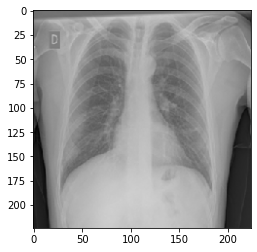

In [ ]:

print(f'True value is : {true}')
image = load_img(img_path, target_size=(224, 224))
img = img_to_array(image)/255
img = img.reshape((1, 224, 224, 3))

result = model.predict(img)
result = np.argmax(result, axis=-1)
print('Prediction is:')
if result == 0:
    print("Normal")
elif result == 1:
    print("Viral Pneumonia")
else:
    print("COVID ")
    
plt.imshow(image)